## Vineeth Reddy
## Data Science and Business Analytics Intern @ The Sparks Foundation
### Data Analysis on Superstore

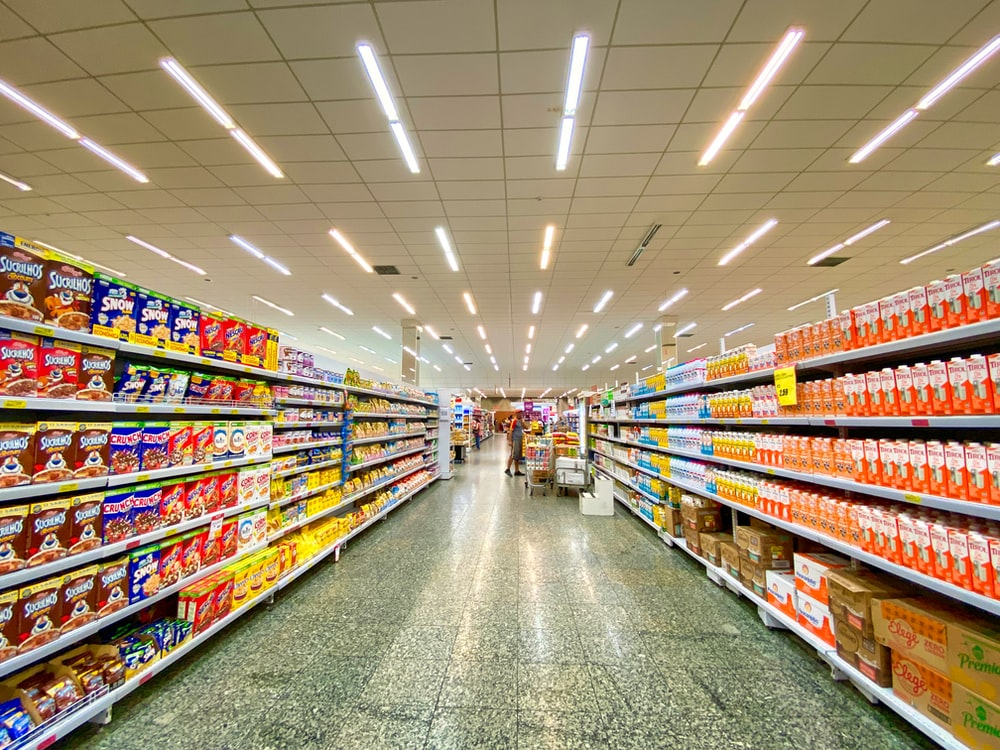

In [1]:
#importing all the rquired libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the data and viewing the first 5 rows
df=pd.read_csv('SampleSuperstore.csv',header=0)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Shape of the data
df.shape

(9994, 13)

In [4]:
#checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Statistics of the data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


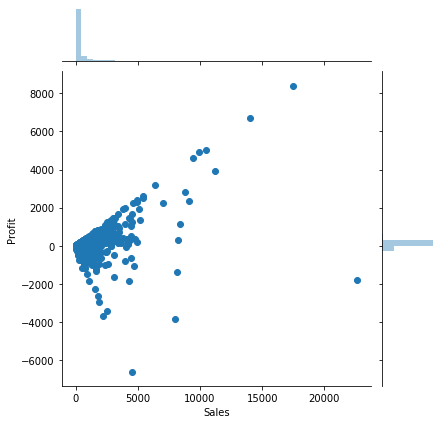

In [7]:
#plotting to joint plot to check for outliers
sns.jointplot(x='Sales',y='Profit',data=df)

In [8]:
#treating the outliers in sales
uv=np.percentile(df.Sales,[99])[0]
df.Sales[(df.Sales>3*uv)]=3*uv

C:\Users\vinee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


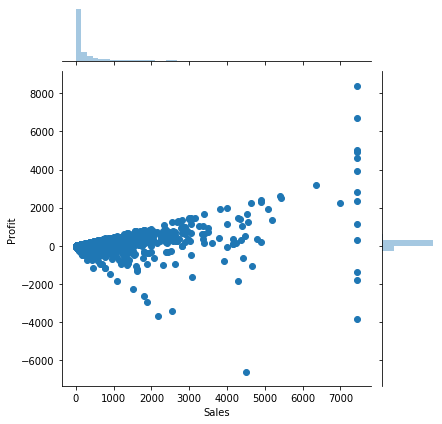

In [9]:
#plotting to joint plot to check for outliers after the treatment
sns.jointplot(x='Sales',y='Profit',data=df)

In [10]:
#Checking for any duplicate values
df.duplicated().sum()

17

In [11]:
#Dropping the duplicate values
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

In [12]:
#column names inside the data
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
#Unique observations in the data
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5813
Quantity          14
Discount          12
Profit          7287
dtype: int64

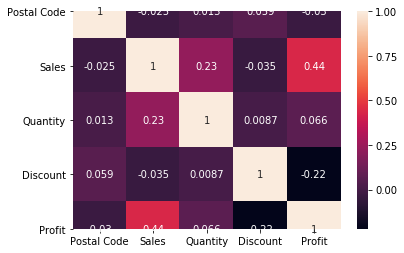

In [14]:
#correlation of the data
sns.heatmap(df.corr(),annot=True)

## Let's start visualizing the Data

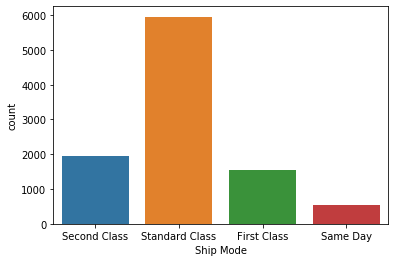

In [15]:
#Frequency of methods in shipment mode
sns.countplot(x='Ship Mode',data=df)

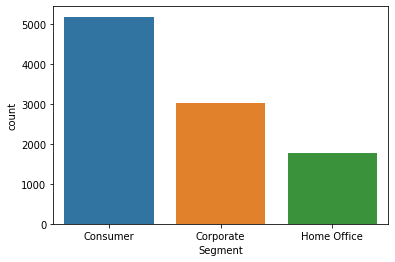

In [16]:
#Frequency of different segments
sns.countplot(x='Segment',data=df)

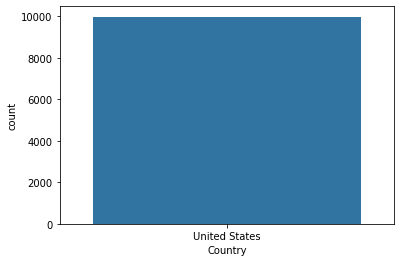

In [17]:
#Frequency of country in which the sales are done
sns.countplot(x='Country',data=df)

#### Here all the values of the country are the same so we can delete the column as it has no significance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

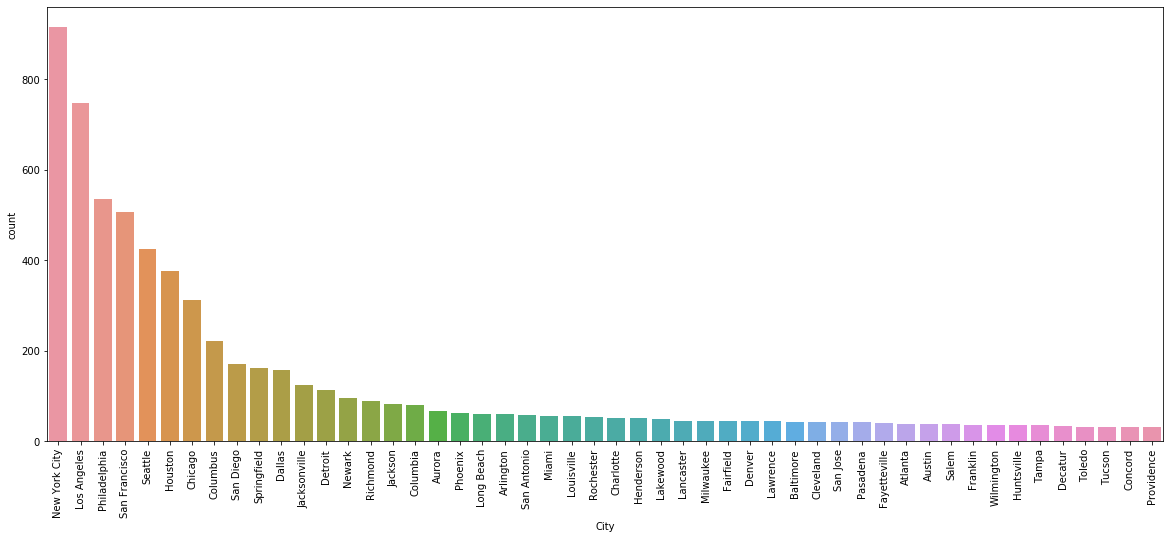

In [18]:
#Quantity of sales in each city
plt.figure(figsize=(20,8))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

#### Postal code is same as the city name so we can ignore it

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

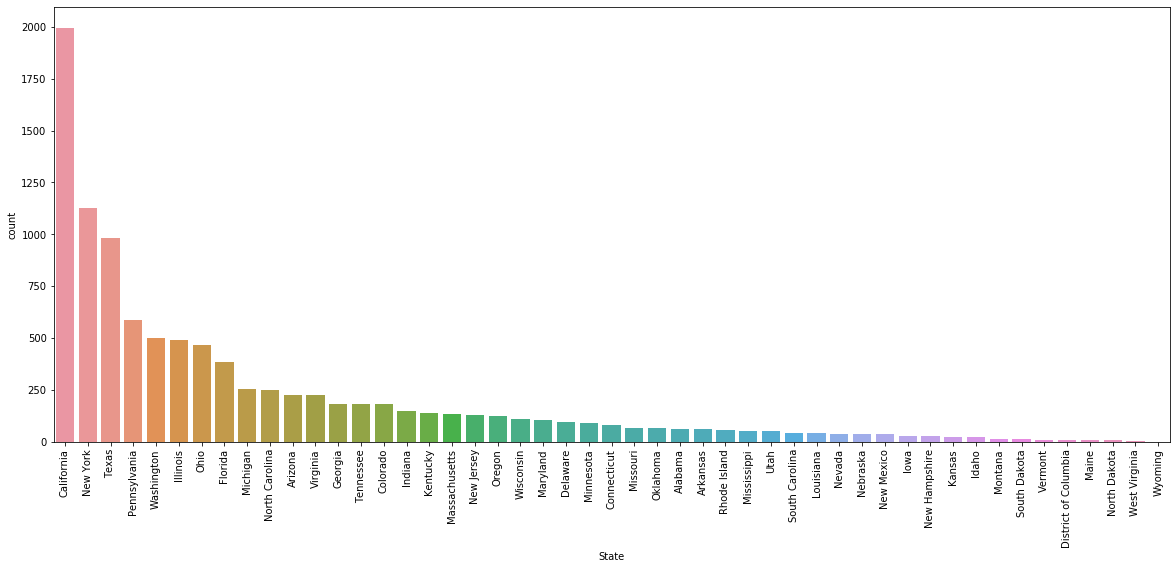

In [19]:
#Quantity of sales in each state
plt.figure(figsize=(20,8))
sns.countplot(x=df['State'], order=(df['State'].value_counts().head(50)).index)
plt.xticks(rotation=90)

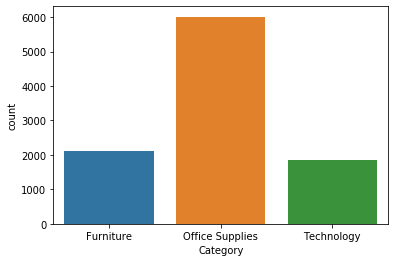

In [20]:
#Frequency of different category of sales 
sns.countplot(x='Category',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

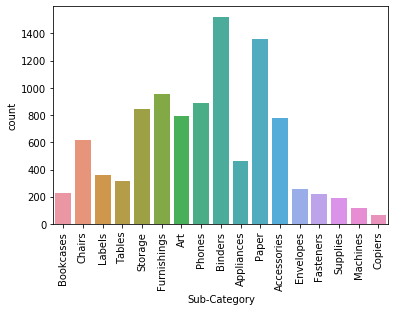

In [21]:
#Frequency of different Sub-category of sales 
sns.countplot(x='Sub-Category',data=df)
plt.xticks(rotation=90)

# profit in different categories

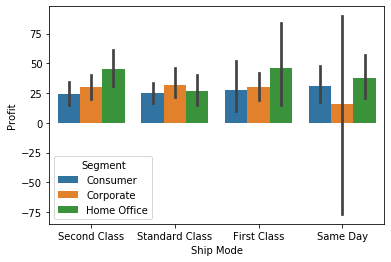

In [22]:
#profit in different segments of sales and shipment method
sns.barplot(x="Ship Mode",y="Profit", hue="Segment", data=df)

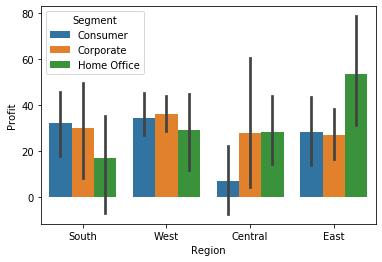

In [23]:
#profit in different segments of sales and regions
sns.barplot(x="Region", y="Profit", hue="Segment", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

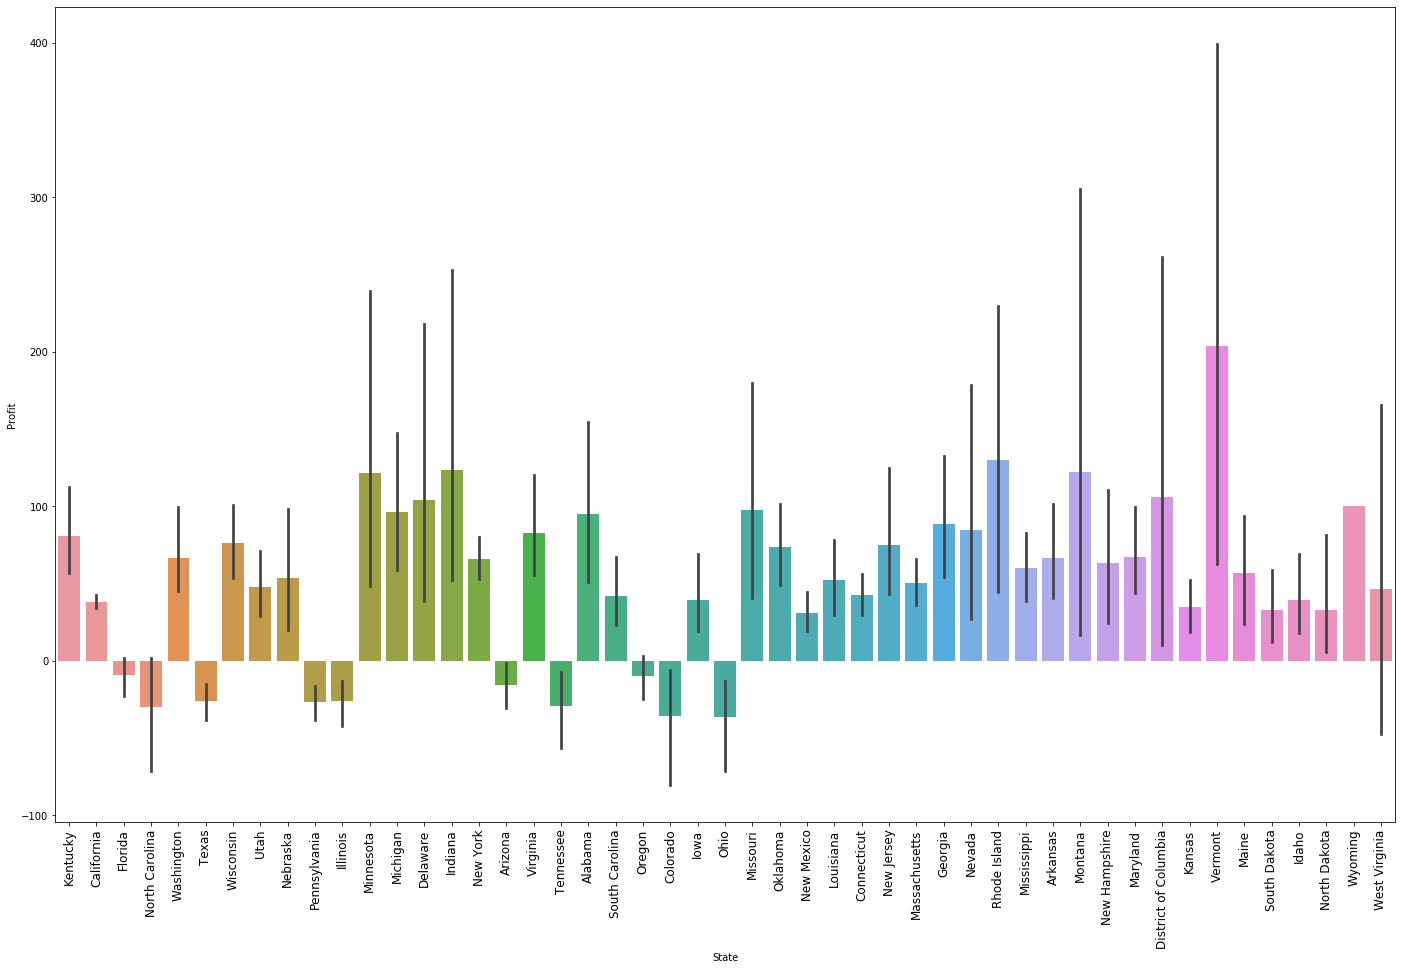

In [24]:
#profits earned in each state 
plt.figure(figsize=[24,15])
sns.barplot(x="State", y="Profit", data=df)
plt.xticks(rotation=90, fontsize=12)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

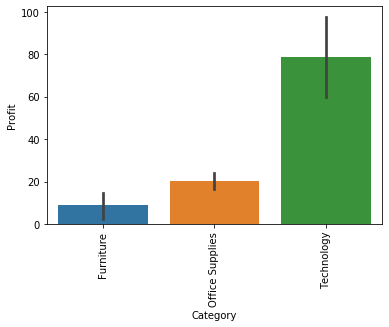

In [25]:
#profit generated by each category of sales
sns.barplot(x='Category', y='Profit',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

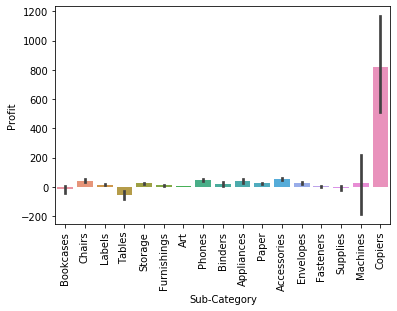

In [26]:
#profit generated by each Sub-category of sales
sns.barplot(x='Sub-Category', y='Profit',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

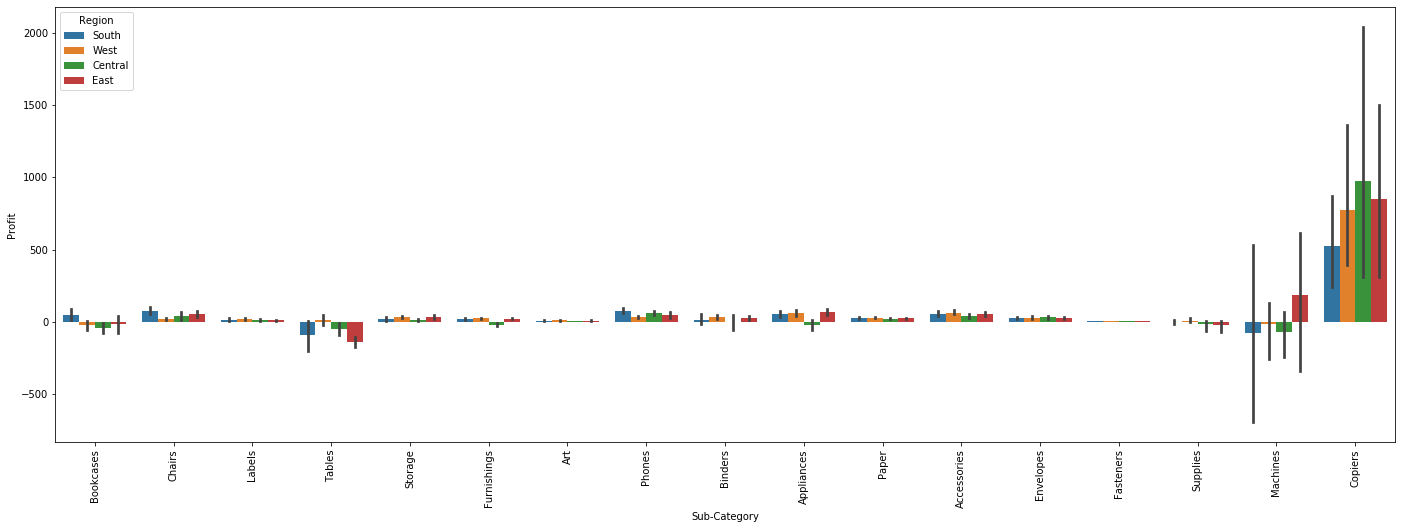

In [27]:
#profit generated by each Sub-category of sales region wise
plt.figure(figsize=[24,8])
ax = sns.barplot(x="Sub-Category",y="Profit",hue="Region",data=df)
plt.xticks(rotation=90)

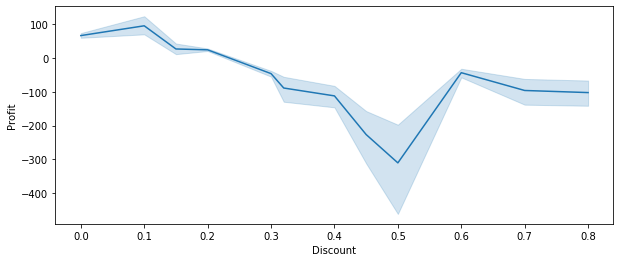

In [28]:
#line graph of discoun and profits
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = df)

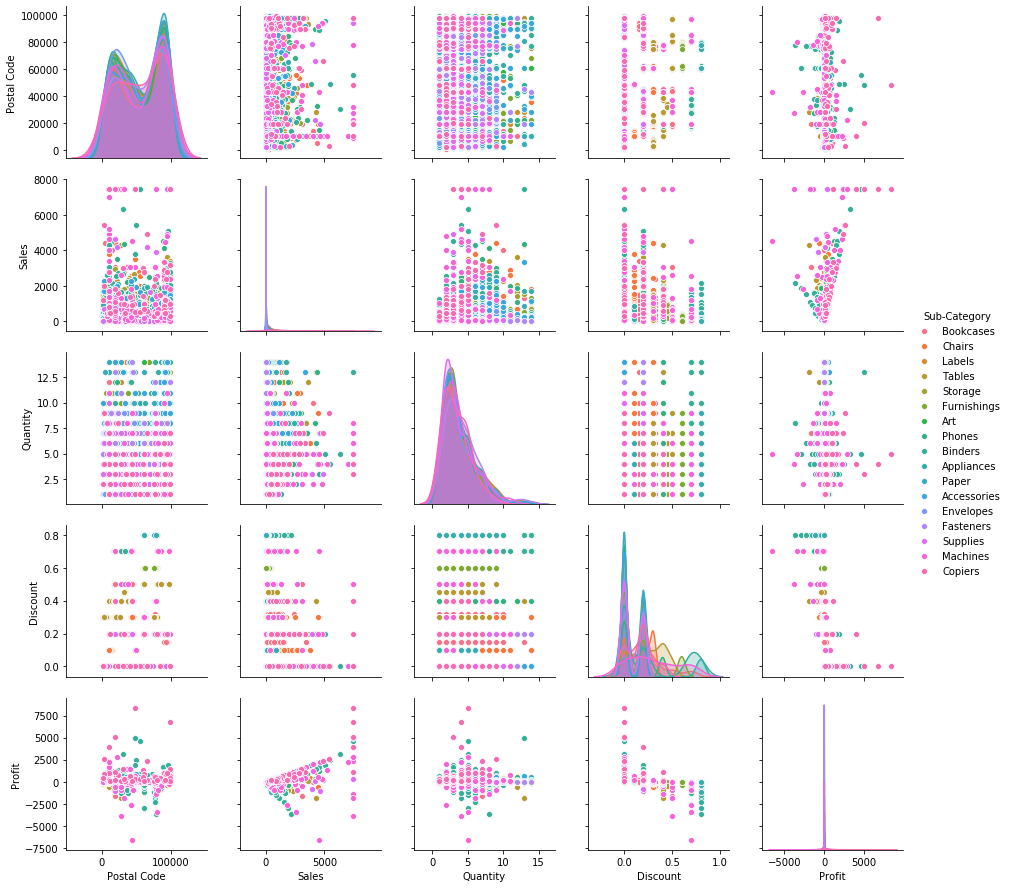

In [29]:
#pairplot of each independent variables sub-category wise
figsize=(15,10)
sns.pairplot(df,hue='Sub-Category')

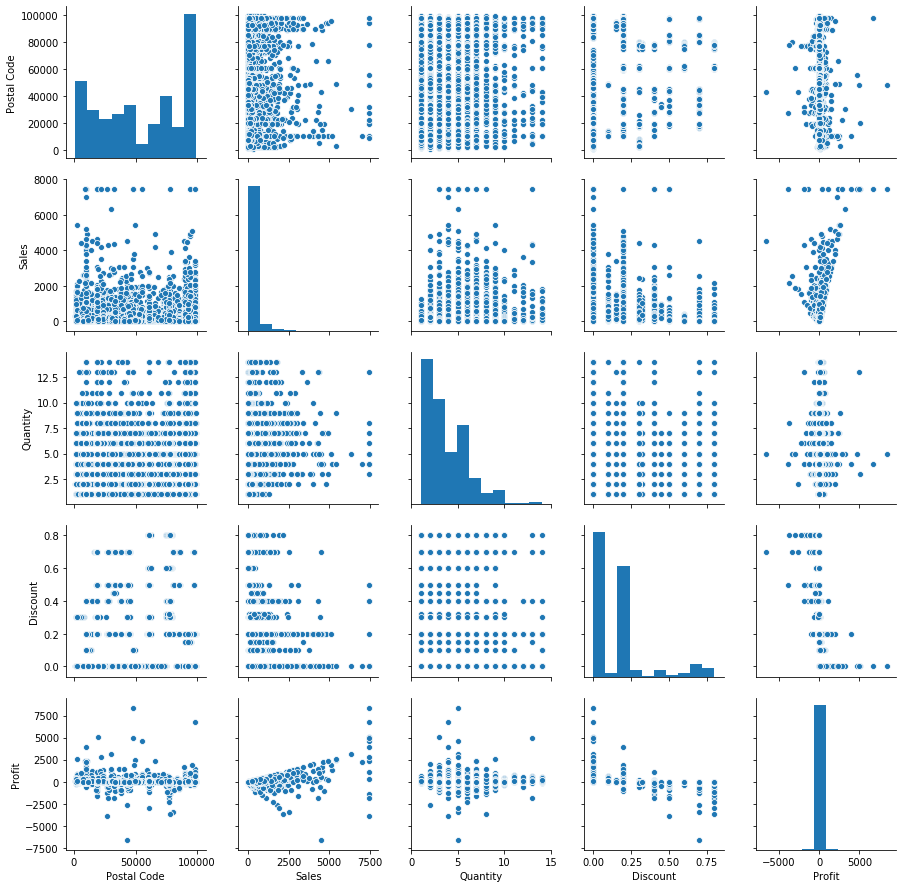

In [30]:
#pairplot of each independent variables
figsize=(15,10)
sns.pairplot(df)

## INSIGHTS:
#### The store is getting maximum of the sales from the state of "California" and from the city of "New York City"
#### But the stores in the state of "Vermont" has been yeilding more profit
#### The stores has been selling a lot of "Office Supplies" and to be in specific the stores are selling large amounts of "Binders"
#### But the stores are making a lot of profit on the sales of  "Copiers"
#### "Copiers" are making a lot of profits than other items in all the regions but have been make more profits in the "Central Region" 
#### Large amount of discounts(0.5) have created a lot of loss for the stores
#### "East Region" Home Supplies are making a great profit
#### Most of the customers are prefering "Standard Class" shipment mode